In [22]:
import gymnasium as gym 
import numpy as np
import matplotlib.pyplot as plt 

In [23]:
env = gym.make("Taxi-v3")
env.reset()
env.render()

c:\Users\aarya\AppData\Local\Programs\Python\Python310\lib\site-packages\gymnasium\envs\toy_text\taxi.py:314: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym.make("Taxi-v3", render_mode="rgb_array")
  gym.logger.warn(


In [24]:
num_rows= env.observation_space.n
num_columns= env.action_space.n 

qtable_MC = np.zeros((num_rows,num_columns))
qtable_TD = np.zeros((num_rows,num_columns))

returns = np.zeros((num_rows,num_columns))
N = np.zeros((num_rows,num_columns))


In [25]:
episode_MC=5000
alpha_MC=0.6
gamma_MC=0.95
epsilon_MC=0.01
cumulative_rewards_MC = np.zeros(episode_MC)

In [26]:
outcomes_MC = []

for i in range(episode_MC):
    state=env.reset()
    done= False
    state=state[0]
    curr_outcome="Failure"
    episode_data = []
    outcomes_MC.append(curr_outcome)
    
    while not done:
        if np.random.uniform(0,1) < epsilon_MC:
            action= env.action_space.sample()
        elif np.max(qtable_MC[state]) > 0 :
            action = np.argmax(qtable_MC[state])
        else:
            action = env.action_space.sample()
            
        next_state,reward,terminated,truncated,info=env.step(action)    
        done = truncated or terminated
        episode_data.append((next_state, action, reward))
        state = next_state
        cumulative_rewards_MC[i] += reward
        if reward==20:
            outcomes_MC[-1]= "Success"
    G = 0
    for t in range(len(episode_data)-1, -1, -1):
        state, action, reward = episode_data[t]
        G = gamma_MC * G + reward
        N[state][action] += 1
        returns[state][action] += alpha_MC*(G - returns[state][action])
        qtable_MC[state][action] = returns[state][action]
        

In [27]:
episode_TD=5000
alpha_TD=0.6
gamma_TD=0.95
epsilon_TD=0.01

cumulative_rewards_TD = np.zeros(episode_TD)

In [28]:

outcomes_TD = []

for i in range(episode_MC):
    state=env.reset()
    done= False
    state=state[0]
    curr_outcome="Failure"
    outcomes_TD.append(curr_outcome)
    
    while not done:
        if np.random.uniform(0,1) < epsilon_TD:
            action= env.action_space.sample()
        elif np.max(qtable_TD[state]) > 0 :
            action = np.argmax(qtable_TD[state])
        else:
            action = env.action_space.sample()
            
        new_state,reward,terminated,truncated,info=env.step(action)    
        done = truncated or terminated
        qtable_TD[state][action] += alpha_TD * (reward + gamma_TD * np.max(qtable_TD[new_state]) - qtable_TD[state][action])
        state = new_state
        cumulative_rewards_TD[i] += reward
        
        if reward==20:
            outcomes_TD[-1]= "Success"



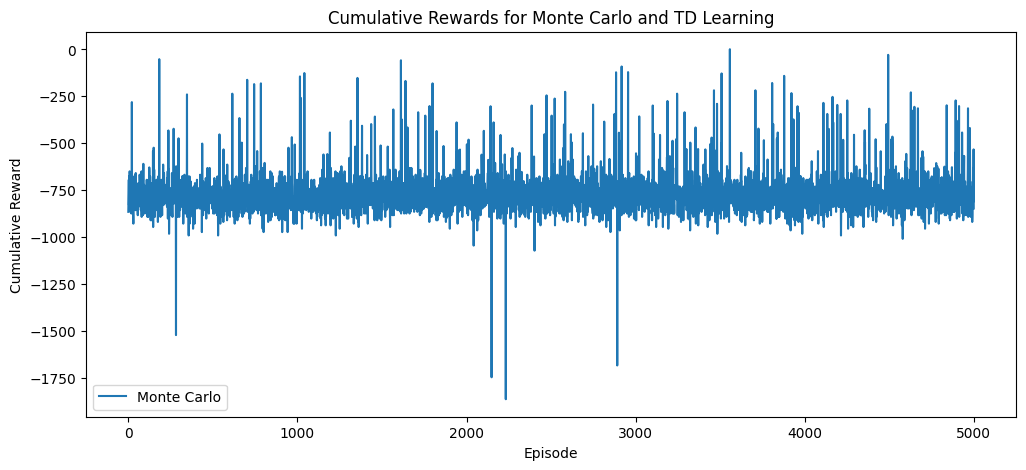

In [29]:
plt.figure(figsize=(12,5))
plt.plot(range(5000), cumulative_rewards_MC, label='Monte Carlo')
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Rewards for Monte Carlo and TD Learning')
plt.legend()
plt.show()

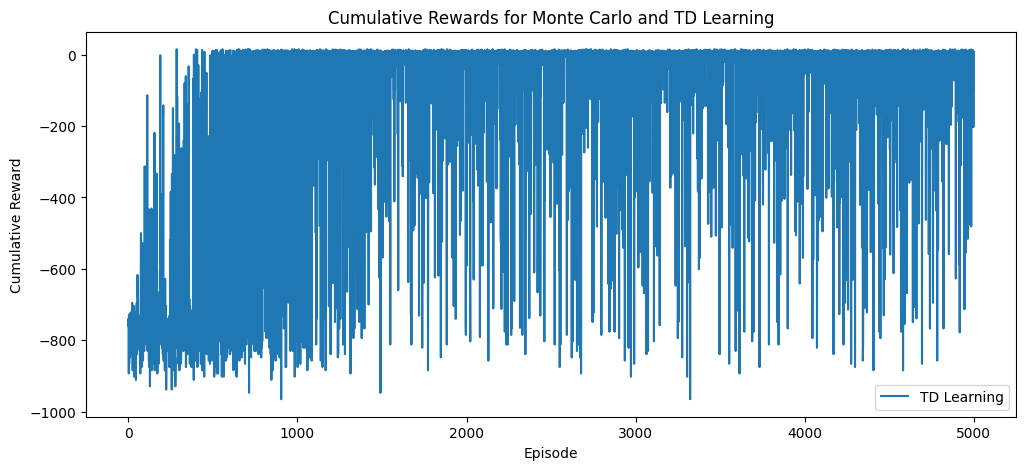

In [30]:
plt.figure(figsize=(12,5))
plt.plot(range(5000), cumulative_rewards_TD, label='TD Learning')
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Rewards for Monte Carlo and TD Learning')
plt.legend()
plt.show()

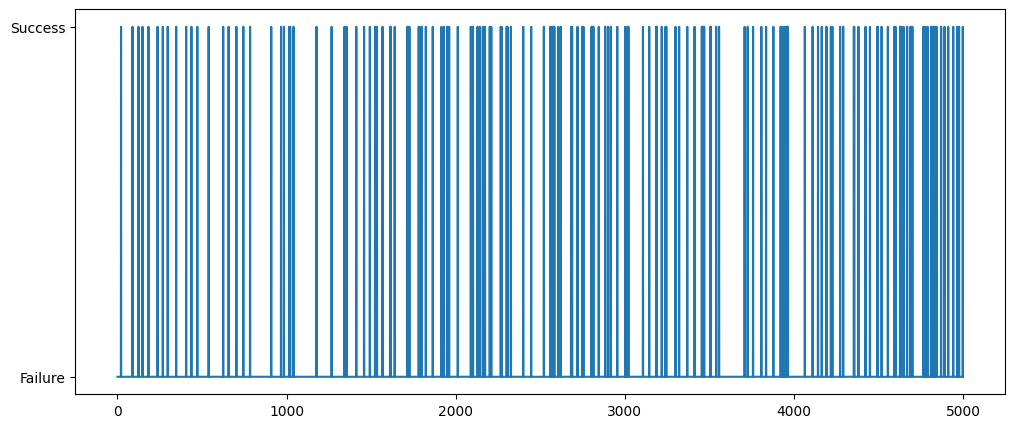

In [31]:
plt.figure(figsize=(12,5))
plt.plot(range(5000),outcomes_MC)

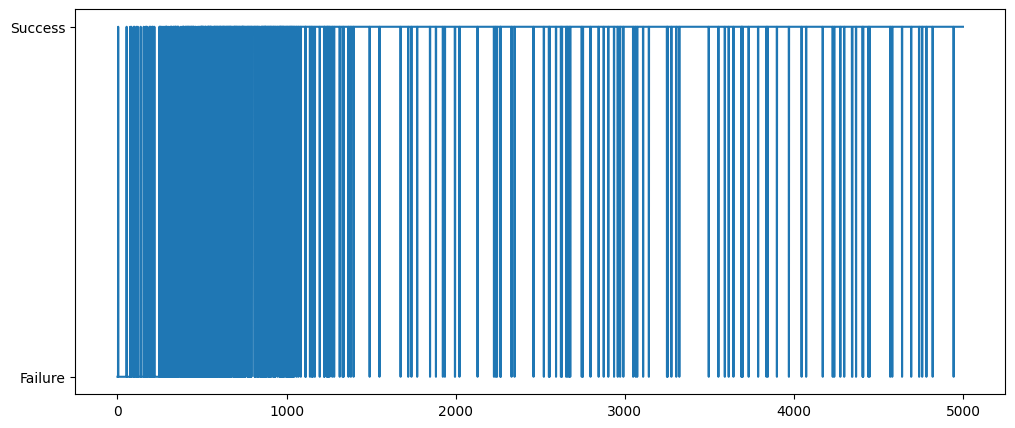

In [32]:
plt.figure(figsize=(12,5))
plt.plot(range(5000),outcomes_TD)

In [33]:
print(qtable_TD)

[[  0.           0.           0.           0.           0.
    0.        ]
 [ -0.53715213   2.74677351  -4.03730101  -4.6367882    5.20997639
  -13.19751705]
 [ -4.85090667  -3.83187777  -5.01761815   4.17081744  10.9512375
   -0.44300562]
 ...
 [  8.80165284  12.58025      8.80136583  -3.1723524   -3.42366487
  -11.48716861]
 [ -2.92508721   2.03130359  -1.59192499  -4.51288002 -13.14252191
  -12.84200981]
 [ 15.0696      14.23399008  15.06307324  18.           5.004
   -9.36      ]]


In [34]:
print(qtable_MC)

[[  0.           0.           0.           0.           0.
   20.        ]
 [  0.         -48.77571965   0.         -57.7224161    0.
  -58.25999008]
 [  0.         -58.00305952   0.         -68.57075976   0.
  -82.38931779]
 ...
 [-73.3939508    0.         -49.05652422   0.         -44.58675845
  -88.44071106]
 [-58.03387785   0.         -65.05329698   0.         -68.38215313
  -78.29053971]
 [-50.02286468   0.         -71.51899119   0.         -79.06456145
  -55.05396315]]


In [35]:
import json
qtable_MC_Taxi = qtable_MC.tolist()  # Convert numpy array to a nested Python list

# Save the Q-table or Q-values to a JSON file
with open('qtable_MC_Taxi.json', 'w') as f:
    json.dump(qtable_MC_Taxi, f)


In [36]:
import json
qtable_TD_Taxi = qtable_TD.tolist()  # Convert numpy array to a nested Python list

# Save the Q-table or Q-values to a JSON file
with open('qtable_TD_Taxi.json', 'w') as f:
    json.dump(qtable_TD_Taxi, f)
